In [1]:
import numpy as np
from TDD.TDD import Ini_TDD,Clear_TDD,set_index_order,get_unique_table_num
from TDD.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\__init__.py:64: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  RuntimeWarning)


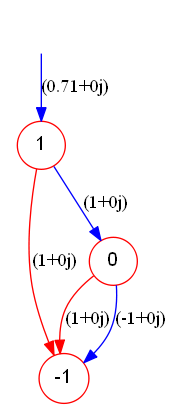

In [2]:
Ini_TDD(['x0','y0','x1','y1','x2','y2'])
U=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var=[Index('x0'),Index('y0')]
ts1=Tensor(U,var)

tdd1=ts1.tdd()
tdd1.show(False)

# print(tdd1.to_array())
# var2=[Index('x1'),Index('y1')]
# ts2=Tensor(U,var2)
# var3=[Index('x2'),Index('y2')]
# ts3=Tensor(U,var3)

# tn=TensorNetwork([ts1,ts2,ts3])
# tdd=tn.cont()
# # print(tdd.to_array())
# tdd.show()

In [3]:
Clear_TDD()

In [5]:
path='Benchmarks/'
# path='Benchmarks/'
# file_name="3_17_13.qasm"
file_name="qft_5.qasm"

# path='Benchmarks/Random Circuits/10x10_cz/'
# file_name="inst_10x10_10_0.qasm"

# path='Benchmarks/Random Circuits/12x12_cz/'
# file_name="inst_12x12_10_0.qasm"
cir = QuantumCircuit.from_qasm_file(path+file_name)

# print(cir.data)

tn,all_indexs = cir_2_tn(cir)

n = get_real_qubit_num(cir)
# print(n)
input_s=[]
output_s=[]
# input_s=[0]*n
# input_s[-1]=1
# input_s=[random.randint(0,1) for k in range(n)]
# output_s=[0]*n
# output_s=[random.randint(0,1) for k in range(n)]
if input_s:
    add_inputs(tn,input_s,n)
if output_s:
    add_outputs(tn,output_s,n)
# add_trace_line(tn,n)

In [ ]:
Ini_TDD(index_order=all_indexs)
t_start=time.time()
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
# print(get_unique_table_num())
tdd.show()

In [ ]:
# file_name="3_17_13_2.qasm"
# cir2=QuantumCircuit.from_qasm_file(path+file_name)
# tn2,all_indexs2=cir_2_tn(cir2)
# set_index_order(all_indexs2)
# tdd2=tn2.cont(optimizer='tree_decomposition')
# print(tdd==tdd2)
# tdd2.show()